In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('ggplot')

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [10]:
# Importing the dataset
dataset = pd.read_csv('I:/WAF with mechine learning/Dataset/DDos 2019 cic/01-12/DrDoS_DNSfinal.csv', sep=',')

In [11]:
dataset.head()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound,Label
0,1217353,14,634,74,60495,17,0,28415,97,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
1,973171,71,634,13,60495,17,1,2,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
2,1213250,14,634,74,46391,17,2,48549,200,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
3,1203225,14,634,74,11894,17,3,48337,200,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
4,1207865,14,634,74,27878,17,4,32026,200,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1


In [12]:
dataset['Label'].value_counts()

Label
1    4908665
0       3354
Name: count, dtype: int64

In [13]:
data_new_20features_X = dataset[['Flow ID', 'Source IP', 'Source Port', 'Destination IP', 'Destination Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std']]


In [14]:
dataset_y = dataset['Label']

Label Encoding for the Dataset

In [15]:
dataset.drop('Label', axis=1, inplace=True)

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_y_trans = le.fit_transform(dataset_y)
data_y_trans

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

Train Test Split 20 Features Dataset

In [17]:
from sklearn.model_selection import train_test_split
X_train_20features, X_test_20features, y_train_20features, y_test_20features = train_test_split( data_new_20features_X, data_y_trans, test_size = 0.30, random_state = 42)

Standardization of the 20 Feature Dataset

In [22]:
from sklearn.preprocessing import StandardScaler

ss20 = StandardScaler()
X_train_20features_std = ss20.fit_transform(X_train_20features)
X_test_20features_std = ss20.fit_transform(X_test_20features)

NN Model for 20 Features

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 20)                0         
                                                                 
 dense_3 (Dense)             (None, 128)               2688      
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11009 (43.00 KB)
Trainable params: 11009

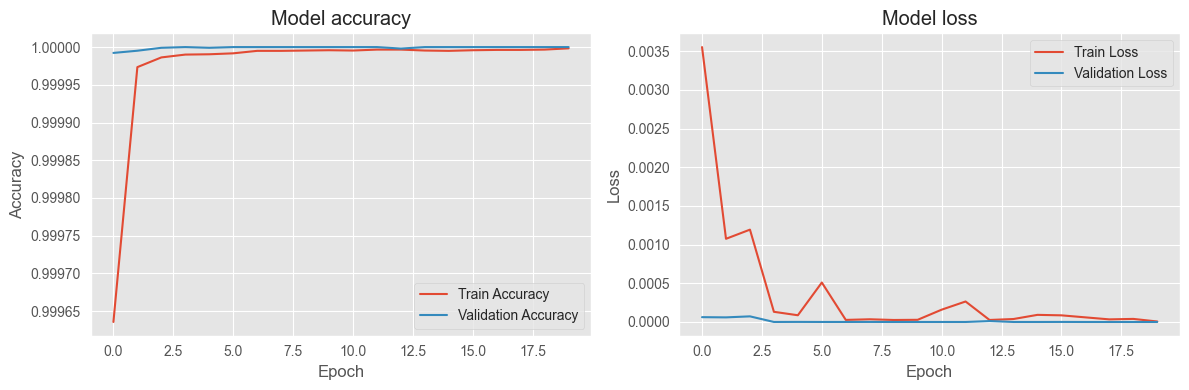

46051/46051 [==============================] - 50s 1ms/step - loss: 4.5524e-04 - accuracy: 1.0000
Test Loss: 0.00045524266897700727
Test Accuracy: 0.9999986290931702
46051/46051 [==============================] - 46s 986us/step
Accuracy on test set: 0.9999986427851135


In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

def create_nn_model(input_shape=(20,)):
    model = Sequential([
        Flatten(input_shape=input_shape),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

def plot_metrics(history):
    plt.figure(figsize=(12, 4))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Create the NN model
nn_model = create_nn_model(input_shape=(20,))

# Display model summary
nn_model.summary()

# Reshape the data for NN input
X_train_reshaped = X_train_20features_std.reshape(-1, 20)
X_test_reshaped = X_test_20features_std.reshape(-1, 20)

# Train the model with early stopping
history = nn_model.fit(X_train_reshaped, y_train_20features, epochs=20, batch_size=256,
                    validation_split=0.3)

# Plot accuracy and loss graphs
plot_metrics(history)

# Evaluate the model
loss, accuracy = nn_model.evaluate(X_test_reshaped, y_test_20features)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

# Make predictions
y_pred = (nn_model.predict(X_test_reshaped) > 0.5).astype("int32")

# Calculate accuracy on test set
test_accuracy = accuracy_score(y_test_20features, y_pred)
print(f'Accuracy on test set: {test_accuracy}')


46051/46051 [==============================] - 53s 1ms/step


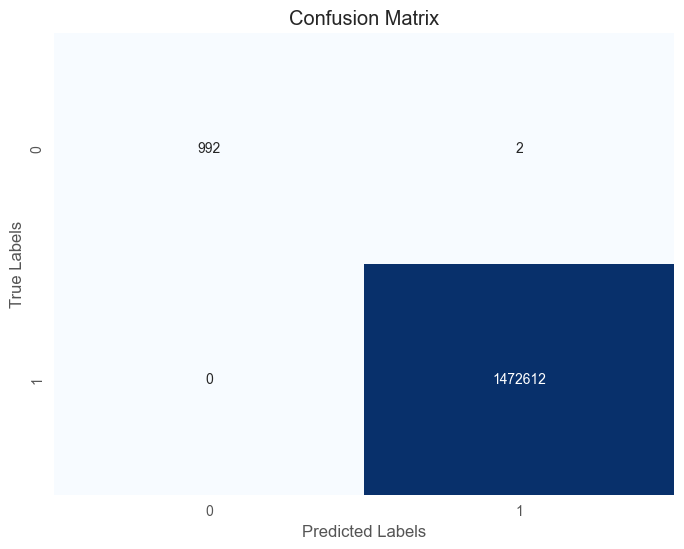

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred = (nn_model.predict(X_test_reshaped) > 0.5).astype("int32")

cm = confusion_matrix(y_test_20features, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [25]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test_20features, y_pred)
recall = recall_score(y_test_20features, y_pred)
f1 = f1_score(y_test_20features, y_pred)
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Precision: 0.9999986418708501
Recall: 1.0
F1 Score: 0.9999993209349639


In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test_20features, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       994
           1       1.00      1.00      1.00   1472612

    accuracy                           1.00   1473606
   macro avg       1.00      1.00      1.00   1473606
weighted avg       1.00      1.00      1.00   1473606

